#### **Home Loan Analysis**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Phase 1 : Data Collection and Preparation**

#### Task 1.1: Load the Home Loan dataset into a Pandas DataFrame

In [12]:
home_loan = pd.read_csv("loan_sanction_test.csv")

In [13]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [14]:
# let's create a copy of our dataset
df = home_loan.copy()

#### PDA (Preliminary Data Analysis)

In [ ]:
# Let's check our bottom dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [ ]:
# Let's check our columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [21]:
# Let's check out the statistical information of our dataset
print(df.info())
print("\nStatistical description:\n",df.describe())
print("\nShape:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None

Statistical description:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000

In [60]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [27]:
# Let's now inspect our dataset for missing values, duplicates, and data type inconsistensies

print(df.isna())


     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
362    False   False    False       False      False          False   
363    False   False    False       False      False          False   
364    False   False    False       False      False          False   
365    False   False    False       False      False          False   
366    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False       False             False   
1

In [29]:
print("\nMissing Values:\n",df.isna().sum())


Missing Values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


It can be seen that gender has 11 missing values,dependants has 10 missing values, self-employed column has 23 missing values , loan amount has 5 missing values, loan amount term has 6 missing values and credit history has 29 missing values. Each will be handled appropriately.

In [35]:
# Let's check the duplicates in our dataset
print(df.duplicated())

print("\nDuplicates:",df.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
362    False
363    False
364    False
365    False
366    False
Length: 367, dtype: bool

Duplicates: 0


It can be seen that our data has no apparent duplicates.

#### Task 1.3: **Cleaning** Clean the dataset by handling missing values, correcting data types, and addressing outliers.



In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Let's handle the gender missing rows first

df['Gender'].value_counts()



Gender
Male      286
Female     70
Name: count, dtype: int64

 Since there are 286 males and 70 females, let's fill our missing gender rows with the male as it is the mode and this will preserve our dataset instead of dropping the rows.

In [44]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [45]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [46]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Let's handle the dependents column


In [47]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

/var/folders/35/6gx67qj537b1hhs17j8k135r0000gn/T/ipykernel_12806/2656529728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)


In [48]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

/var/folders/35/6gx67qj537b1hhs17j8k135r0000gn/T/ipykernel_12806/3186598182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [50]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Let's handle the numerical data of loan amount and loan amount term

In [52]:
# Let's fill the missing values with their means
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

/var/folders/35/6gx67qj537b1hhs17j8k135r0000gn/T/ipykernel_12806/1815417606.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)


In [53]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [54]:
# The credit history is either 1 or 0, so let's fill the values with the most frequent value.

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/var/folders/35/6gx67qj537b1hhs17j8k135r0000gn/T/ipykernel_12806/1465115016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [55]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [61]:
# The missing values have been handled, let's clean the data a little bit more.

cols = [ 'Gender', 'Married', 'Property_Area']


for col in cols:
        if col in df.columns:
                df[col] = df[col].str.strip()

In [62]:
# Let's confirm if the datatypes are accurate for the features
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [76]:
# Let's check for outliers in the applicant's income column
Q1 = df['ApplicantIncome'].quantile(0.25)
Q2 = df['ApplicantIncome'].quantile(0.50)
Q3 = df['ApplicantIncome'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)


# Any value lower than -430 and greater than 8354 is an outlier.

low = df[df['ApplicantIncome'] < -430]
high = df[df['ApplicantIncome'] > 8354]

Q1: 2864.0

Q2: 3786.0

Q3: 5060.0
IQR: 2196.0
lower bound : -430.0

Upper bound : 8354.0


In [79]:
high['ApplicantIncome']

8      13633
13     12173
18      9226
81     72529
83      8449
91     13518
98      9719
124    12500
143    32000
144    10890
145    12941
147     8703
179    15312
184    10166
187     9167
188    13083
194    10000
200     8706
230    14911
247    10000
263    18840
272    24797
279    29167
283     9000
284    10000
285     8750
302    14987
323    16000
331     9699
350     8667
360     8550
366     9200
Name: ApplicantIncome, dtype: int64

Since these applicants Income can affect their loan approval status, it is best practice to leave as is instead of capping them. Same with Co-applicant's income ,loan amounts,and loan amounts term. The outlier's are necessary as they can affect or influence loan status or loan approvals of applicants. So they will be left as is instead of capping them.

#### **Phase 2: Exploratory Data Analysis (EDA)**

#### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [82]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.839237
std,4910.685399,2334.232099,60.946040,64.620366,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,367.0,136.132597,60.946040,28.0,101.0,126.0,157.5,550.0
Loan_Amount_Term,367.0,342.537396,64.620366,6.0,360.0,360.0,360.0,480.0
Credit_History,367.0,0.839237,0.367814,0.0,1.0,1.0,1.0,1.0


In [86]:
# Let's group the numerical features

numerical_features = df.select_dtypes(include=['float64','int64']).columns
df[numerical_features]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,1.0
365,5000,2393,158.0,360.0,1.0


In [87]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,367.0,136.132597,60.946040,28.0,101.0,126.0,157.5,550.0
Loan_Amount_Term,367.0,342.537396,64.620366,6.0,360.0,360.0,360.0,480.0
Credit_History,367.0,0.839237,0.367814,0.0,1.0,1.0,1.0,1.0


#### Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

In [91]:
# Let's define a function to visualize the distributions of numerical features

def numerical_features_distribution(df, column):
    print(f"Feature: {column}")
    print("="*35)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew()}")
    print(f"Kurtosis: {df[column].kurt()}")


    # Let's plot the histogram

    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins = 25, color = 'teal')
    plt.title(f"\nDistribution of {column}", fontsize = 15)
    plt.xlabel(column)
    plt.ylabel('Frequency')


    # Boxplot

    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color = 'teal')
    plt.title(f"\n Boxplot of {column}", fontsize = 15)

    plt.tight_layout()
    plt.show()


    # To show the skewness

    if df[column].skew() > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")

    elif df[column].skew() > 0.5 :
        print(f"{column} is moderately skewed.")

    else:
        print(f"{column} is fairly symmetric")

Feature: ApplicantIncome
       ApplicantIncome
count       367.000000
mean       4805.599455
std        4910.685399
min           0.000000
25%        2864.000000
50%        3786.000000
75%        5060.000000
max       72529.000000

Skewness: 8.441374954190996
Kurtosis: 103.12748954245407


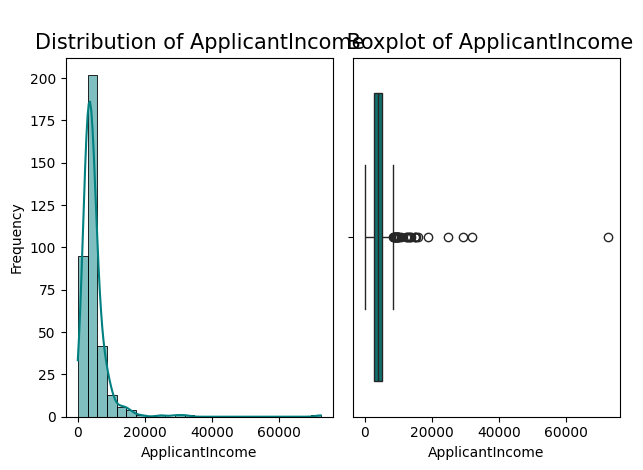


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [92]:
# 1. Applicant Income

numerical_features_distribution(df, 'ApplicantIncome')

#### **Applicant's Income(Univariate Analysis)**



1. Highly Right-Skewed Distribution
Skewness = 8.44 indicates extreme positive skew, meaning:
Most applicants have low to moderate incomes, but
A few applicants have very high incomes that significantly stretch the distribution to the right.


2. Very High Kurtosis (103.13)
Indicates the distribution has extreme outliers and heavy tails.
A few applicants have unusually high income (like 72,529).
<br>

Recommendation:
Consider log transformation to reduce skewness and normalize the distribution.


3. Impact on Loan Approval Prediction :
Due to heavy skew and outliers, models like linear regression or KNN might perform poorly if this feature isn't transformed.
Income is a key determinant in loan eligibility, so its skewed distribution could bias the model toward high-income applicants.
<br>

Recommendation:
Bin or categorize income levels (low, medium, high) to help tree-based models or improve interpretability.
Check correlation between income and loan approval (Loan_Status) to determine predictive power.

Feature: CoapplicantIncome
       CoapplicantIncome
count         367.000000
mean         1569.577657
std          2334.232099
min             0.000000
25%             0.000000
50%          1025.000000
75%          2430.500000
max         24000.000000

Skewness: 4.257356934477602
Kurtosis: 30.191142101153826


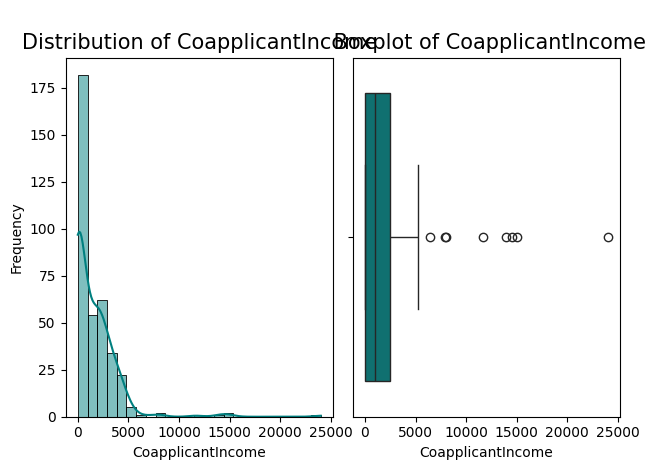


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [ ]:
# 2. Coapplicant Income
numerical_features_distribution(df, 'CoapplicantIncome')

#### **COapplicant's Income(Univariate Analysis)**


1. Moderately High Positive Skewness (4.26)
Indicates a right-skewed distribution:
Most coapplicants have low income or no income.
A few coapplicants have very high income, pulling the distribution rightward.

2. Very High Kurtosis (30.19)
Indicates the presence of extreme outliers (especially toward the higher end).

3. Impact on Loan Prediction Models :
<br>
CoapplicantIncome is part of total household income and can increase loan eligibility.
However, due to the skew and outliers, its contribution may be over- or under-estimated without transformation.
<br>
Recommendation:
Combine ApplicantIncome and CoapplicantIncome into a TotalIncome feature.
Apply log transformation to the combined value to reduce skewness.


Feature: LoanAmount
       LoanAmount
count  367.000000
mean   136.132597
std     60.946040
min     28.000000
25%    101.000000
50%    126.000000
75%    157.500000
max    550.000000

Skewness: 2.2386880958561215
Kurtosis: 9.577537260263627


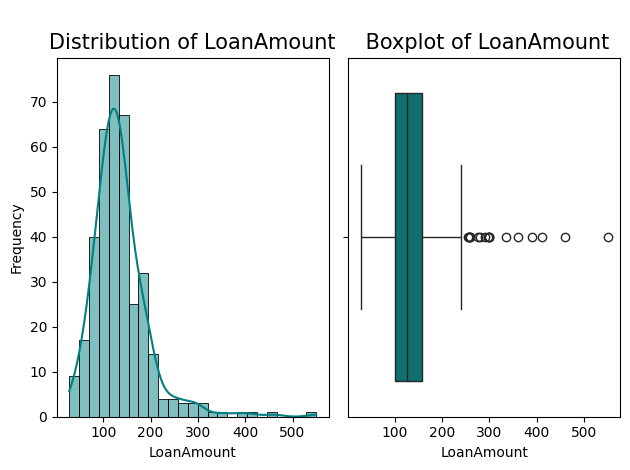


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.


In [95]:
# 3. Loan Amount


numerical_features_distribution(df, 'LoanAmount')

#### **Loan Amount (Univariate Analysis)**

1. Moderate-to-High Positive Skew (2.24)
The distribution is right-skewed, meaning:
Most loan amounts are on the lower side, but
A few very large loans (e.g., 550) pull the mean higher than the median.

2. High Kurtosis (9.58)
Indicates heavy tails and extreme values (outliers).

3. Relationship with Income :
It's likely that LoanAmount is correlated with ApplicantIncome or TotalIncome, but the outliers might break linearity.
Before modeling, check if the correlation improves after log transformation.

Feature: Loan_Amount_Term
       Loan_Amount_Term
count        367.000000
mean         342.537396
std           64.620366
min            6.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.701307119941833
Kurtosis: 8.845846724471155


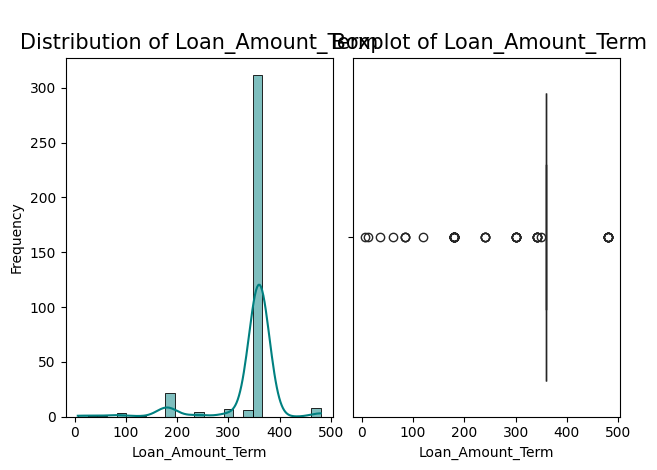

Loan_Amount_Term is fairly symmetric


In [97]:
# 4. Loan Amount Term

numerical_features_distribution(df, 'Loan_Amount_Term')

#### **Loan Amount Term**

1. Heavily Left-Skewed Distribution (Skewness = -2.70)
Most applicants are taking longer-term loans (e.g., 360 months = 30 years).
A few applicants have chosen very short terms (e.g., 6 months, 12 months).
<br>
Insight: Most loans are long-term, which aligns with typical housing loans (20–30 years). The few short-term loans are outliers and could represent:
Special-purpose loans (not home purchase)
Data entry issues
Unique financial situations
<br>
2. High Kurtosis (8.85)
Indicates heavy tails, meaning a few terms are far from the average.
For example, terms like 6, 12, or even 480 months (40 years) are rare and add tail weight to the distribution.


Feature: Credit_History
       Credit_History
count      367.000000
mean         0.839237
std          0.367814
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -1.8547214446428353
Kurtosis: 1.4478521776740618


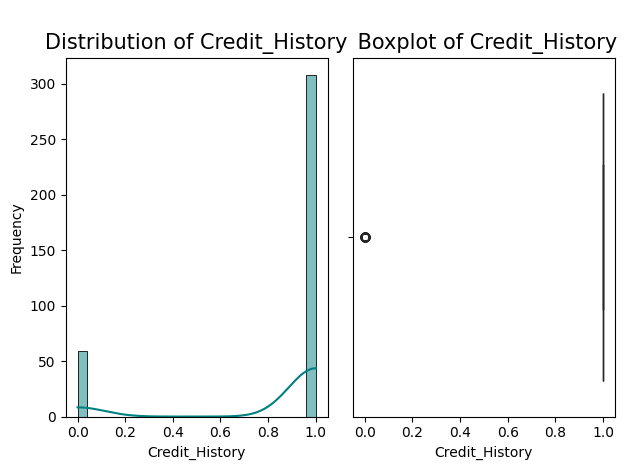

Credit_History is fairly symmetric


In [98]:
# 5. Credit_History

numerical_features_distribution(df, 'Credit_History')

#### **Credit History**

1. (0.0 or 1.0)
This feature indicates whether an applicant has a good credit history (1 = good, 0 = bad).

2. Heavily Left-Skewed (Skewness = -1.85)
Since most values are 1.0, the distribution is left-skewed — the bulk is concentrated at the higher end.
The minority group (with 0.0) pulls the distribution left.
<br>
Why Credit_History is Important :
Credit_History is extremely predictive for loan approval decisions in most banking datasets. Applicants with a history of paying back loans are much more likely to get approved.

| Feature Type | Observation | Implication|
|--------------|--------------|-----------|
| Numeric Features| Most are highly skewed while very few are fairly symmetrical| These long tails can distort algorithms sensitive to scale like KNN, linear regression.|
| Applicants Income| Very highly skewed| This may indicate the presence of outliers|
| Coapplicant Income| Also highly skewed but not as much as Applicant's income| This may indicate the presence of outliers|
| Loan Amount| Skewness is getting low but still moderately high|This may indicate an Important Predictor|
| Loan Amount Term| This is negative skewness| This shows that the mean is less than the median and shows that the distribution is fairly symmetrical|
|Credit History| This is also a fairly negative skewness| It can be an important predictor

#### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

In [99]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [105]:
# Let's analyse education first.
df['Education'].head()
df['Education'].value_counts()

Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64

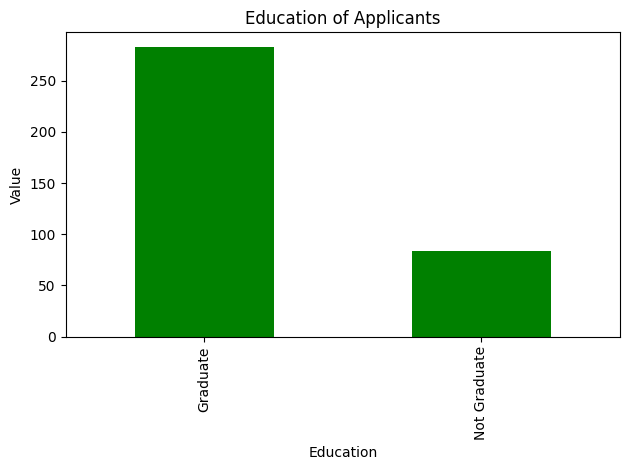

In [111]:
df['Education'].value_counts().plot(kind='bar',color='green')
plt.xlabel('Education')
plt.ylabel('Value')
plt.title('Education of Applicants')
plt.tight_layout()

In [116]:
education = df['Education'].value_counts()

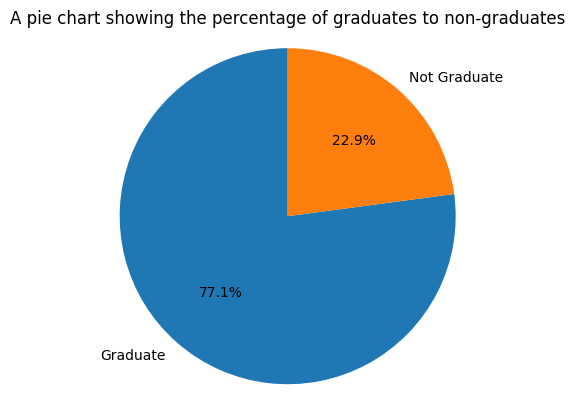

In [124]:
plt.pie(education, labels=education.index, autopct='%1.1f%%',startangle=90)
plt.title('A pie chart showing the percentage of graduates to non-graduates')
plt.axis('equal')
plt.show()


It can be seen from our visualization that the percentage of graduates in the applicants is more than twice that of the non-graduates.

Insights:
1. Majority of Applicants are Graduates
<br>
Over 77% of home loan applicants are graduates.
Indicates that the applicant pool is skewed toward individuals with higher education qualifications.
2. Education level could influence income levels, job type, and financial literacy — which in turn may impact:
Loan approval
Loan amount requested
Repayment behavior

In [138]:
# Let's group them with applicantincome

educ = df.groupby('Education').agg({'ApplicantIncome':'sum'})
educ

,ApplicantIncome
Education,
Graduate,1463094
Not Graduate,300561


Insight:
<br>
    Graduates generates more income in total, education increases the chances of a good job which may tend to influence their loan approval status.

In [141]:
b = df.groupby('Education')['ApplicantIncome'].describe()
b

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,283.0,5169.943463,5442.521566,0.0,3029.5,4000.0,5519.50,72529.0
Not Graduate,84.0,3578.107143,1928.734531,0.0,2427.0,3276.0,4142.75,13083.0


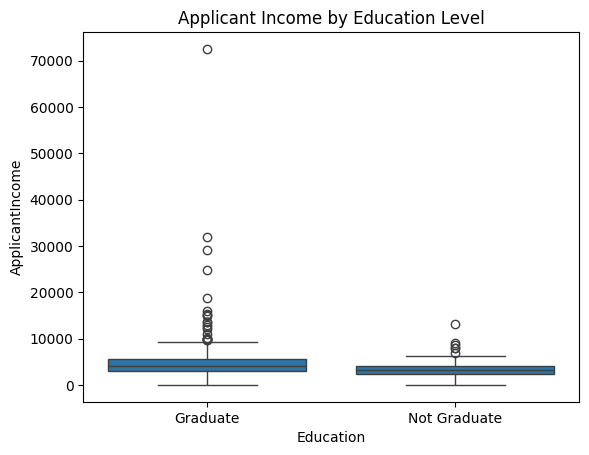

In [ ]:
# Let's show the boxplot comparison of education and Applicant's Income

sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.title('Applicant Income by Education Level')
plt.show()


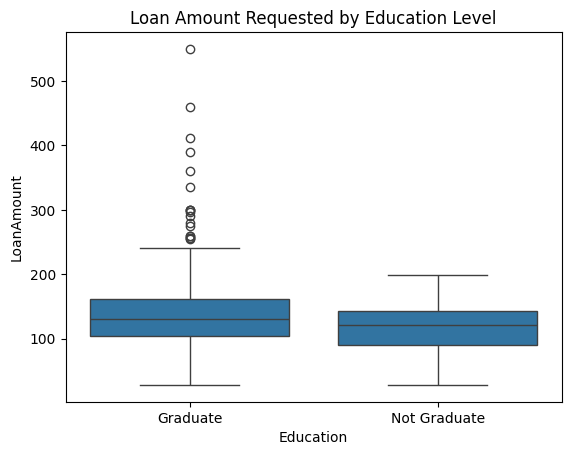

In [143]:
# Let's show the boxplot comparison of education and loan amount
sns.boxplot(data=df, x='Education', y='LoanAmount')
plt.title('Loan Amount Requested by Education Level')
plt.show()


In [125]:
# Let's analyse employment status

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [126]:
df['Self_Employed'].value_counts()

Self_Employed
No     330
Yes     37
Name: count, dtype: int64

In [130]:
# Let's check the percentage of the self-employed are graduates and those that are non-graduate

Employment_status = df.groupby('Self_Employed').agg({'Education':'count'})
Employment_status

,Education
Self_Employed,
No,330
Yes,37


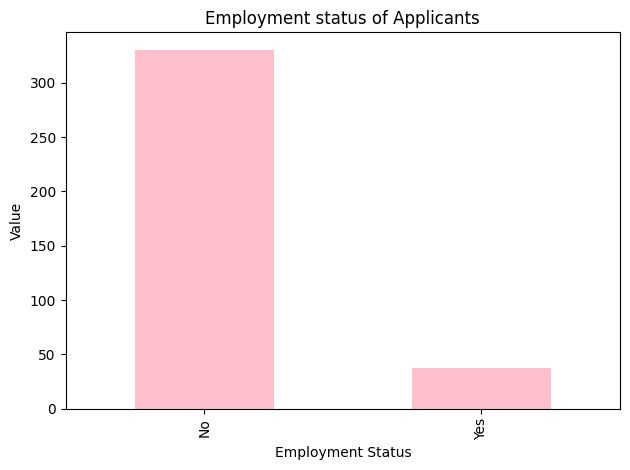

In [132]:
df['Self_Employed'].value_counts().plot(kind='bar',color='pink')
plt.xlabel('Employment Status')
plt.ylabel('Value')
plt.title('Employment status of Applicants')
plt.tight_layout()

In [133]:
employment = df['Self_Employed'].value_counts()

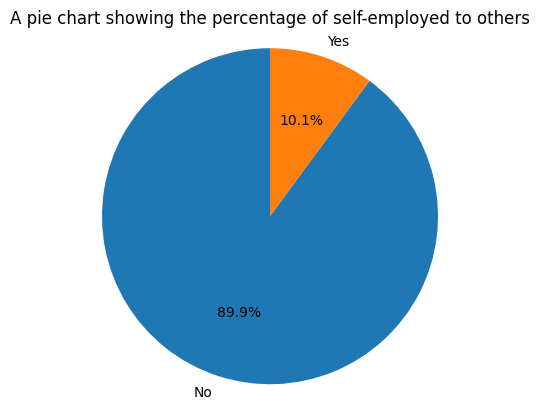

In [134]:
plt.pie(employment, labels=employment.index, autopct='%1.1f%%',startangle=90)
plt.title('A pie chart showing the percentage of self-employed to others')
plt.axis('equal')
plt.show()

Insights:
1. Majority of Applicants are Salaried or Not Self-Employed
Almost 90% of the applicants are not self-employed.

2. Self-Employed Applicants are a Minority
Only 10% are self-employed.

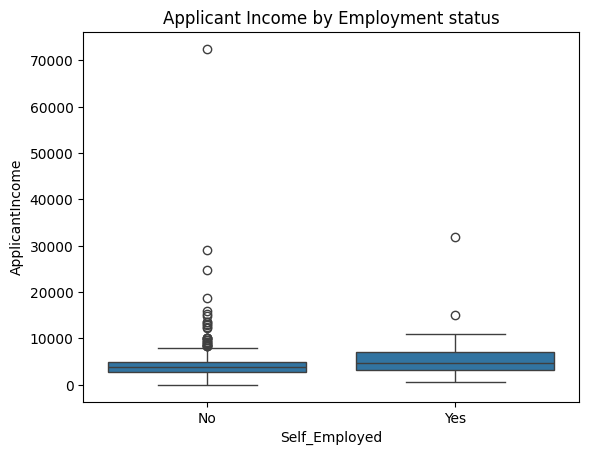

In [144]:
# Let's show the boxplot comparison of self-employed and Applicant's Income

sns.boxplot(data=df, x='Self_Employed', y='ApplicantIncome')
plt.title('Applicant Income by Employment status')
plt.show()

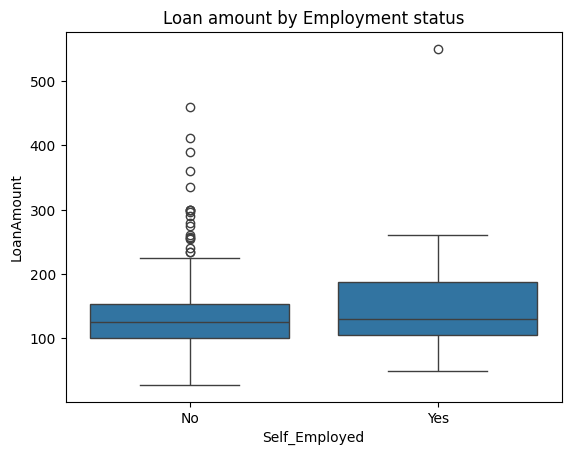

In [145]:
# Let's show the boxplot comparison of self-employed and Applicant's Income

sns.boxplot(data=df, x='Self_Employed', y='LoanAmount')
plt.title('Loan amount by Employment status')
plt.show()

In [146]:
# Let's analyse property area

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [147]:
df['Property_Area'].value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

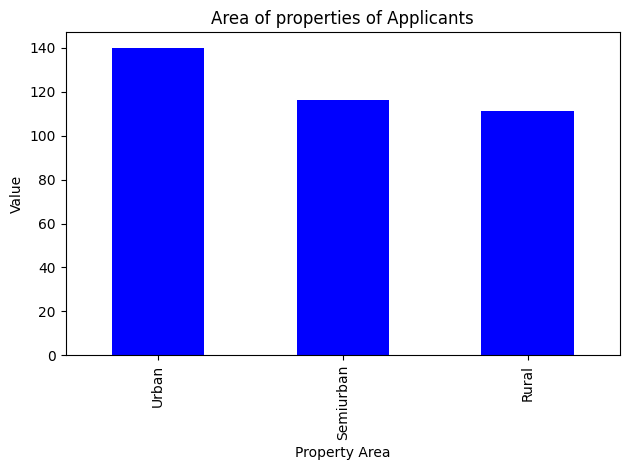

In [148]:
# Let's visualize

df['Property_Area'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Property Area')
plt.ylabel('Value')
plt.title('Area of properties of Applicants')
plt.tight_layout()

In [149]:
prop = df['Property_Area'].value_counts()

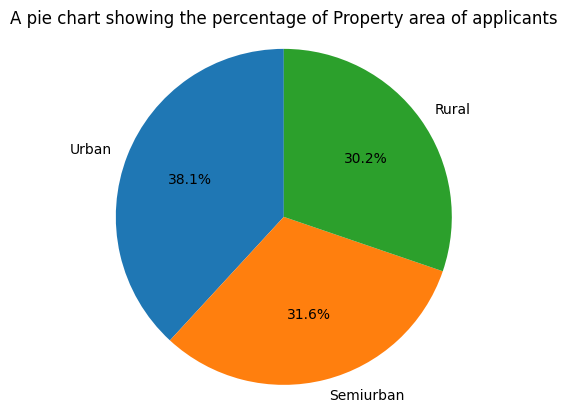

In [150]:
plt.pie(prop, labels=prop.index, autopct='%1.1f%%',startangle=90)
plt.title('A pie chart showing the percentage of Property area of applicants')
plt.axis('equal')
plt.show()

#### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

In [151]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [152]:
# But since we don't have a loan status , let's do some feature engineering



df['Loan_Status'] = np.random.choice([0, 1], size=len(df))


In [153]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [157]:
def trivariate_plot(df, x_col, y_col, hue_col):
    

    # plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

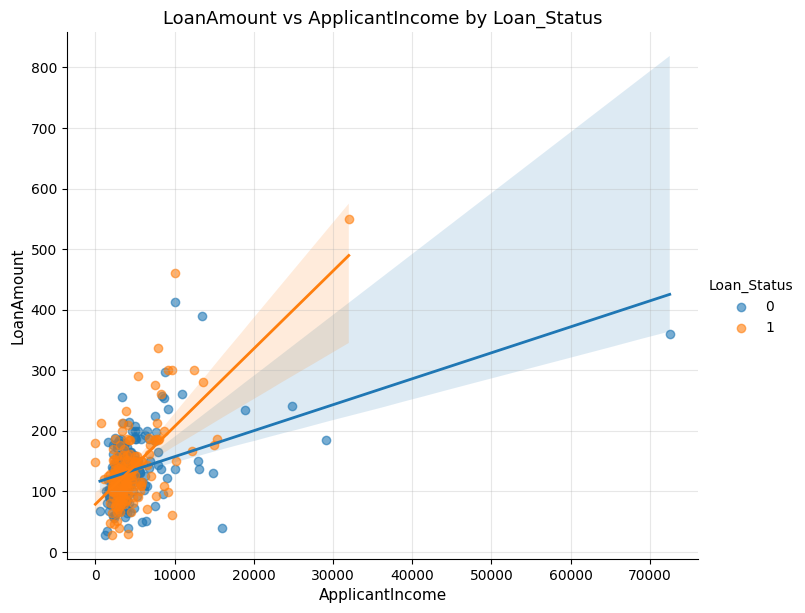

In [158]:
# Example: explore alcohol vs density by wine quality category
trivariate_plot(df, 'ApplicantIncome', 'LoanAmount', 'Loan_Status')

1. Positive Correlation Exists
<br>
There is a general upward trend between ApplicantIncome and LoanAmount for both approved (Loan_Status = 1) and not approved (Loan_Status = 0) loans.
<br>
As applicant income increases, the requested loan amount tends to increase as well — this is expected behavior.
<br>
2. Loan Approval Is More Common in Lower to Mid-Income Ranges
Most of the approved loans (orange dots) are clustered where:
<br>
ApplicantIncome is between 2,000 – 10,000, and
LoanAmount is between 50 – 250.
This suggests that applicants with moderate income levels are more likely to get approved.



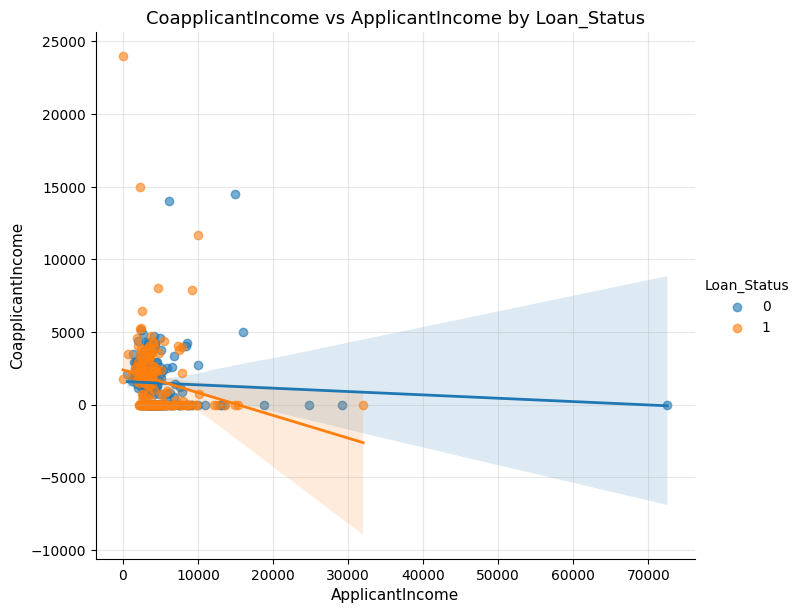

In [159]:
# Example: explore alcohol vs density by wine quality category
trivariate_plot(df, 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status')

Key Insights:
1. High Applicant Income is not equal to High Coapplicant Income
Most applicants with high incomes have little to no coapplicant income.
Inversely, low applicant incomes sometimes have high coapplicant income — likely when spouses or family members contribute.
2. Approved Loans (Orange) Cluster in Lower to Mid Applicant Incomes
Approved applications are densely concentrated in the range:
ApplicantIncome: ~2,000 to 10,000
CoapplicantIncome: 0 to ~5,000
This suggests dual-income families with moderate earnings have higher approval rates.
3. High Applicant Incomes Alone Do Not Guarantee Approval
There are rejected applications (blue dots) even at ApplicantIncome > 50,000 with zero coapplicant income.
These applicants may have been denied due to other risk factors (e.g., poor credit, high loan amount, or self-employed status).
4. Slight Negative Regression Trend


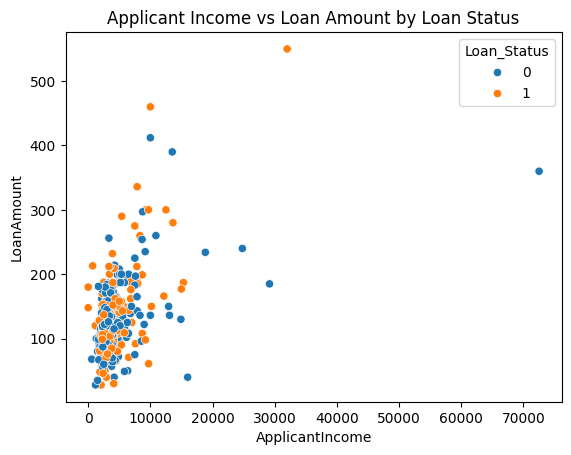

In [160]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Applicant Income vs Loan Amount by Loan Status')
plt.show()


#### Task 2.5: Identify trends, anomalies, and patterns that could impact loan outcomes.

Based on my analysis of the dataset above, these are the trends, patterns ,and anomalies I noticed.

Key Trends & Patterns Impacting Loan Outcomes :
1. Credit History is the Strongest Predictor
Majority of approved loans have a Credit_History of 1.0.
Implication:
Applicants with no or poor credit history (0.0 or missing) are less likely to get approved, despite high income.
2. Applicant and Coapplicant Income Are Highly Skewed
ApplicantIncome Skewness: 8.44, Kurtosis: 103.13 ,Very high outliers (up to 72,529).
CoapplicantIncome Skewness: 4.25, Kurtosis: 30.19 , Moderate outliers.

3. Loan Amount is Skewed :
Insight:
Large loan amounts without strong income or credit backing are often rejected.
Approved applicants request loans aligned with income levels.
4. Education & Employment Status Influence Trends :
Education:
Graduates = 77%, Not Graduates = 23%
While not directly linked to approval yet, graduates may be seen as more creditworthy(Often the fact of life, they are always more likely to get approved for loans than non-graduates.).

Anomaly Detected
1. High-Income Rejections
Some applicants with very high income are still rejected.
This implies:
High income isn’t enough , credit history and loan amount matter more based on the information obtained from this dataset.
